# Vergleich von Wiederholbarkeit von Keypunkten von SIFT, TILDE, LIFT und SuperPoint

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import pickle
from typing import List, Tuple, Dict, Any
import eval_repeatability as er
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

### Lade Daten

In [2]:
data = {}

In [3]:
detector_names = ['sift', 'lift', 'superpoint', 'tilde']
for detector_name in detector_names:
    with open('outputs/repeatability_{}.pkl'.format(detector_name), 'rb') as src:
        data[detector_name] = pickle.load(src, encoding='utf-8')

### Plot Funktionen

In [36]:
def plot_num_keypoints_per_image_per_detector(ax, data, detector_names: List[str], collection_name: str, set_name: str):
    for detector_name in detector_names:
        data_set = data[detector_name][collection_name][set_name]
        ax.plot(np.log(data_set['num_kpts_per_image']), label=detector_name)
        
    ax.set_title('{} - Vergleich der Anzahl gefundener Keypunkte'.format(set_name))
    ax.set_xlabel('Bild i')
    ax.set_ylabel('Anzahl gefundener Keypunkte (log)')
    ax.legend();
    return ax

In [37]:
def plot_num_repeatable_keypoints_per_detector(ax, data, detector_names: List[str], collection_name: str, set_name: str, epsilon):
    for detector_name in detector_names:
        y = data[detector_name][collection_name][set_name]['epsilon'][epsilon]['cum_repeatable_kpts']
        y = y / y[0]
        plt.plot(np.arange(len(y)), y, label=detector_name)
    ax.set_title('{}: Wiederholbarkeit für Epsilon {}'.format(set_name, eps))
    ax.set_xlabel('Anzahl Bilder')
    ax.set_ylabel('Prozent wiederholbare Keypunkte')
    ax.legend();

In [38]:
def plot_metrics(data, collection_name: str, set_name: str, detector_names: List[str], epsilon: int):
    fig, axes = plt.subplots(nrows=2, ncols=1)
    axes[0] = plot_num_keypoints_per_image_per_detector(axes[0], data, detector_names, collection_name, set_name)
    axes[1] = plot_num_repeatable_keypoints_per_detector(axes[1], data, detector_names, collection_name, set_name, epsilon)

### Erklärung:
- Der erste Graph zeigt die **Anzahl der gefundenen Keypunkte pro Bild** innerhalb eines Sets an für die verschiedenen Detektoren an.
- Der zweite Graph zeigt den **prozentualer Anteil an Keypunkten, die **bis zum i-ten Bild **wiederholbar sind**, das heißt in allen Bildern bis zum zum i-ten Bild gefunden wurden, für jeden Detektor. Die maximale Distanz der Positionen eines Keypunktpaares darf $\epsilon$ Pixel nicht überschreiten.

### Kollektion: Webcam

In [7]:
collection_name = 'webcam'

### Set: Chamonix

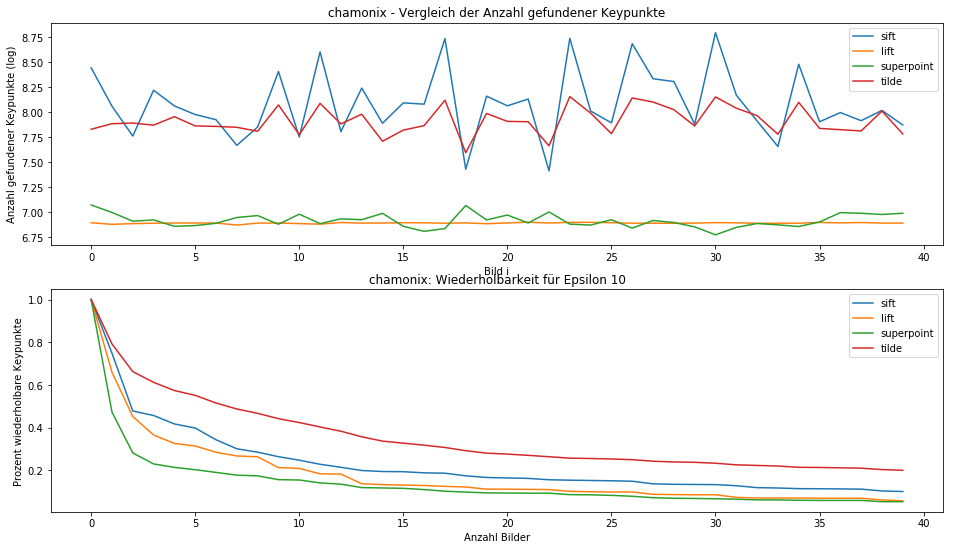

In [42]:
set_name = 'chamonix'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_names, 10)

Interessant ist hier, dass Sowohl SIFT als auch TILDE sehr sensitiv auf Veränderungen innerhalb des Bildes reagieren, das heißt schon kleine Veränderungen innerhalb des Bildes können die Anzahl der gefundenen Keypunkte stark beeinträchtigen.

### Set Courbevoie

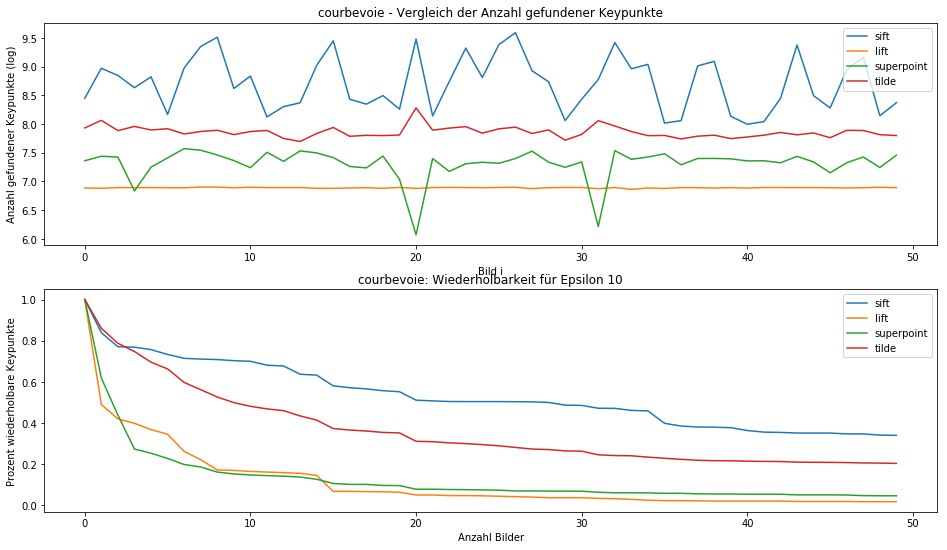

In [43]:
set_name = 'courbevoie'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_names, 10)

Interessant ist hier, dass die Anzahl der gefundenen Keypunkte bei **SuperPoint** an zwei Punkten deutlich abfällt, während sie bei SIFT und TILDE ansteigt. Eine genauere Analyse der Bilder wäre interessant.

### Set Frankfurt

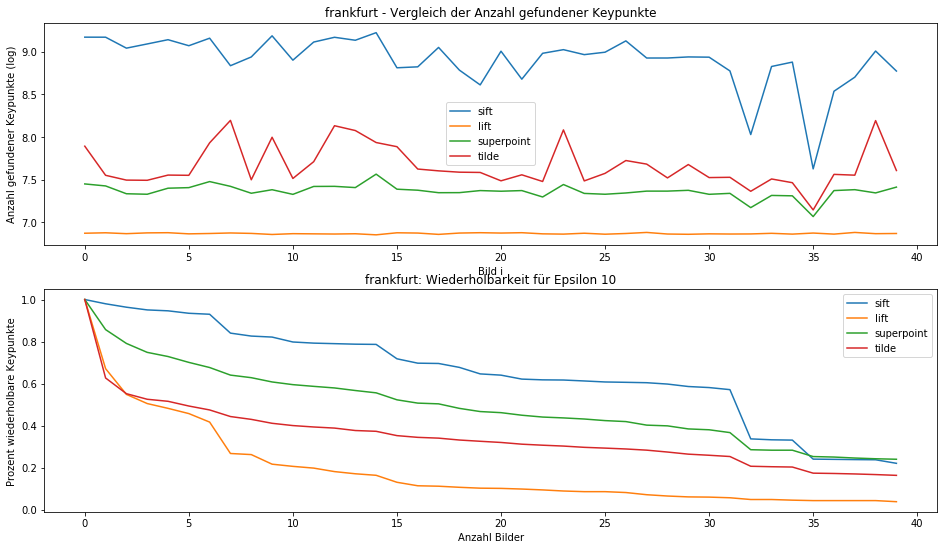

In [44]:
set_name='frankfurt'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_names, 10)

### Set Mexico

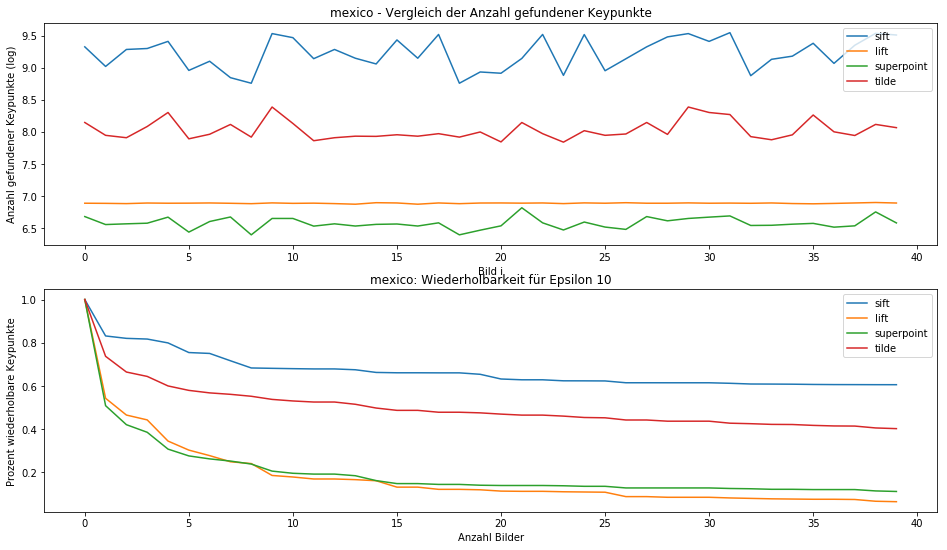

In [45]:
set_name='mexico'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_names, 10)

### Set Panorama

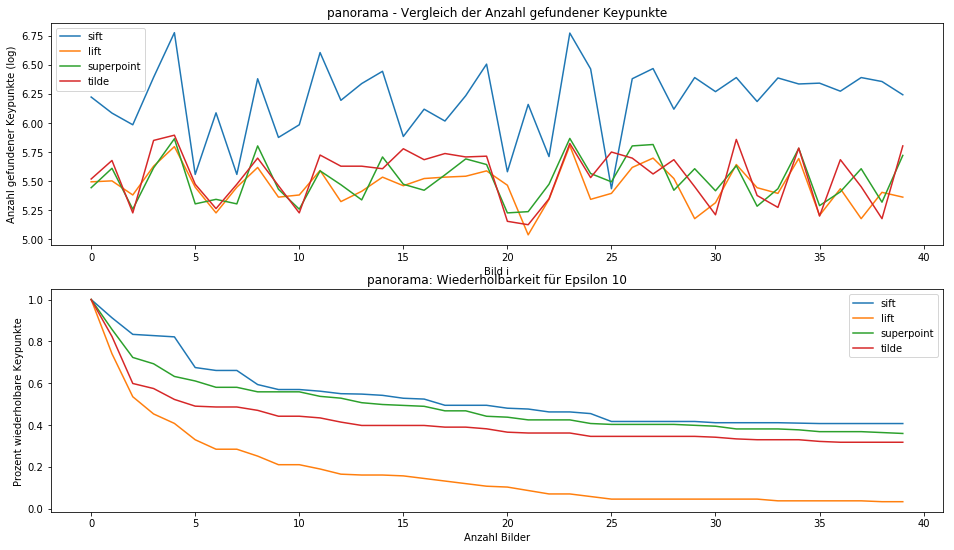

In [51]:
set_name='panorama'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_names, 10)

### Set StLouis

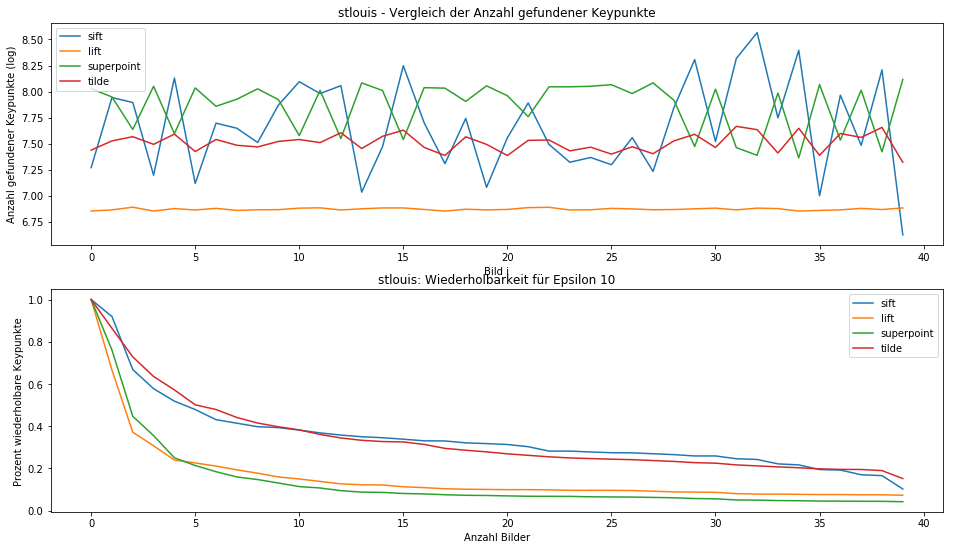

In [47]:
set_name='stlouis'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_names, 10)